2020 Mar
### <h1><center>Python Technques </center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
# returns size of data in bytes

import sys
sys.getsizeof(df)

1675828134

## numpy

In [4]:
# add new feature with several conditions

df['Fraud_Heuristic'] = np.where(((df['type'] == 'TRANSFER') &(df['amount'] > 200000)),1,0)

In [5]:
# Random numbers

# seeds can be any integer to generate pseudo random numbers
np.random.seed(0)

# lower, upper, number of random numbers
x = np.random.randint(0,10, 10)
print("x:\n", x)

# reshape
x_reshaped = x.reshape(2, 5)
print("\nreshaped x:\n", x_reshaped)

x:
 [5 0 3 3 7 9 3 5 2 4]

reshaped x:
 [[5 0 3 3 7]
 [9 3 5 2 4]]


In [6]:
# sum
x_sum = x.sum()
print("\nsum of x:\n", x_sum)

# dot
x_dot = np.dot(x_reshaped[0], x_reshaped[1])
print("\ndot product\n", x_dot)


# max
x_max = x.max()
print("\nmax x :\n")

# index of max
x_max_index = x.argmax()
print("\nindex of max x:\n", x_max_index)


# mean
x_mean = np.mean(x)
print("\nx mean:\n", x_mean)

# median
x_med = np.median(x)
print("\nmedian:\n", x_med)

# std
x_std = np.std(x)
print("\nx std:\n", x_std)


sum of x:
 41

dot product
 94

max x :


index of max x:
 5

x mean:
 4.1

median:
 3.5

x std:
 2.4269322199023193


In [7]:
# arange 

y = np.arange(1,26)
y = y.reshape(5,5)
print("\ny: \n", y)


# linespace
# start, end, num of points
z = np.linspace(1,10, 10)
print("\n line space: \n", z)




# identity matrix
I = np.eye(5)
print("\nidentity \n", I)


# add 
print("\n y+I = \n",  np.add(I, y))


# multiply 
print("\n y*I = \n",  np.multiply(I, y))


# multiply 
print("\n I*y = \n",  np.multiply(I, y))


# col row sum
print("\n col sum\n", y.sum(axis = 1))
print("\n row sum\n", y.sum(axis = 0))


y: 
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]

 line space: 
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]

identity 
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

 y+I = 
 [[ 2.  2.  3.  4.  5.]
 [ 6.  8.  8.  9. 10.]
 [11. 12. 14. 14. 15.]
 [16. 17. 18. 20. 20.]
 [21. 22. 23. 24. 26.]]

 y*I = 
 [[ 1.  0.  0.  0.  0.]
 [ 0.  7.  0.  0.  0.]
 [ 0.  0. 13.  0.  0.]
 [ 0.  0.  0. 19.  0.]
 [ 0.  0.  0.  0. 25.]]

 I*y = 
 [[ 1.  0.  0.  0.  0.]
 [ 0.  7.  0.  0.  0.]
 [ 0.  0. 13.  0.  0.]
 [ 0.  0.  0. 19.  0.]
 [ 0.  0.  0.  0. 25.]]

 col sum
 [ 15  40  65  90 115]

 row sum
 [55 60 65 70 75]


In [8]:
# itertool 
import itertools

for a in itertools.product(range(3), range(5)):
    print(a)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)


# Visualization techniques

In [9]:
# confustion matrix

y_test = np.eye(3).astype(int).reshape(9,1)
y_pred = np.array([0,1,0, 0,0,0, 1,0,1])

# f1 score
from sklearn.metrics import f1_score
print(f1_score(y_pred = y_pred, y_true = y_test, average = 'micro'))

0.5555555555555556


In [10]:
# confusion matrix

def plot_confusion_matrix(cm,
                          target_names,               # labels of the diagram
                          title='Confusion Matrix',   # set title of diagram
                          cmap=None,
                          normalize=True,             # whether to normalize the result to the ratio or not
                          save_image=True,
                          image_name='confusion.png'):           # whether to save the image or not
        
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    # calculate  TP + TN / all
    accuracy = np.trace(cm) / float(np.sum(cm))
    # calculate  FP + FN / all
    misclass = 1 - accuracy

    # set the color of cmap to use
    if cmap is None:
        cmap = plt.get_cmap('Reds')
        
    # set figure size
    plt.figure(figsize=(8, 6))
    # show image (interpolation = nearest: sets the pixel to nearest original resolution)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    # set ticks on axis
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    # normalize to rate
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # threshhold for color
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    # set the numbers on each quadrant
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted\naccuracy={:0.4f},  misclass={:0.4f}'.format(accuracy, misclass))
    if save_image:
        plt.savefig(image_name)
    plt.show()

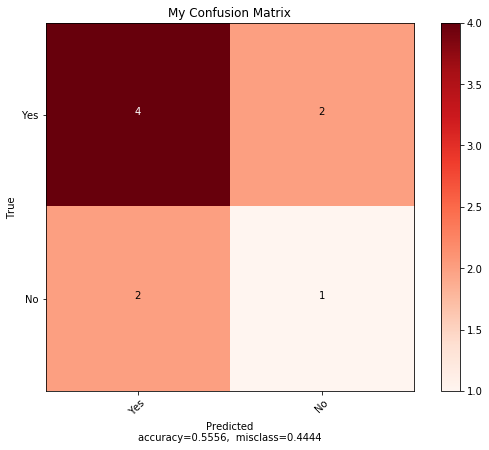

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred = y_pred, y_true = y_test)
plot_confusion_matrix(cm, ['Yes', 'No'], title = "My Confusion Matrix", normalize = False, save_image = False)

In [12]:
# correlation map


def plot_corr(data,
              title = "Feature Correation",
              save_image = False, 
              image_name = "correlation.png"):
    colormap = plt.cm.RdBu
    plt.figure(figsize=(8,6))
    plt.title(title, y=1.05)
    sns.heatmap(data.astype(float).corr(), linewidths=0.1,cmap=colormap, vmax=1.0, square=True, annot=True)
    if save_image:
        sns.savefig(image_name)

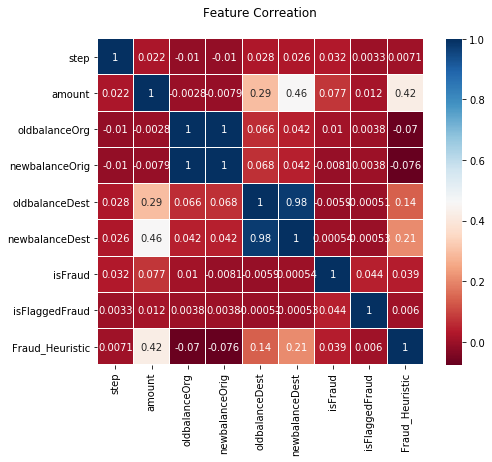

In [13]:
plot_corr(df.drop(['type', 'nameOrig', 'nameDest'], axis = 1))

In [14]:
# correlation with target

def plot_corr_target(df, target_name):
    
    cori = []
    for col in df.drop(target_name, axis = 1).columns:
        cori.append([col, df[col].corr(df[target_name])])
    df_cor = pd.DataFrame(sorted(cori, key = lambda x: abs(x[1]), reverse = True), columns = ['feature', 'corr'])
    plt.figure(figsize=(10, 7))
    plt.barh(df_cor['feature'], df_cor['corr'])
    plt.title("Correlation with Target", y = 1.05)
    plt.show()
    

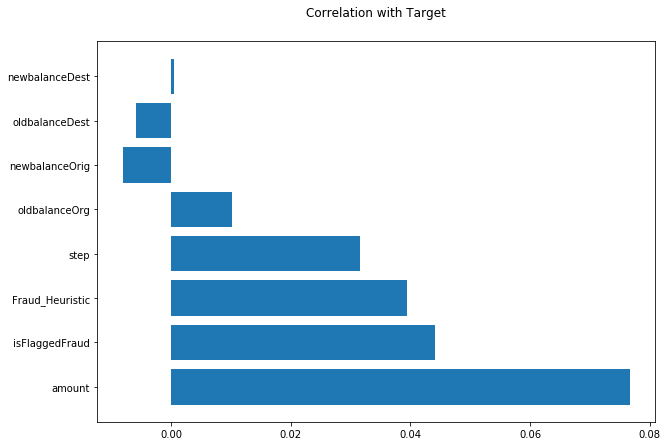

In [15]:
plot_corr_target(df.drop(['type', 'nameOrig', 'nameDest'], axis = 1), "isFraud")

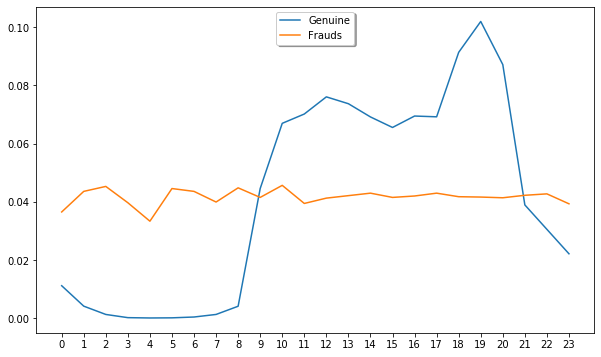

In [16]:
# time series

df_time = df.copy()

# divde into stepwise time
df_time['hour'] = df_time['step'] % 24

# sum up the candidates in each time group 

frauds = []
genuine = []

for i in range(24):
    f = len(df_time[(df_time['hour'] == i) & (df_time['isFraud'] == 1)])
    g = len(df_time[(df_time['hour'] == i) & (df_time['isFraud'] == 0)])
    frauds.append(f)
    genuine.append(g)

# plot the time series data   
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(genuine/np.sum(genuine), label='Genuine')
ax.plot(frauds/np.sum(frauds), label = 'Frauds' )
plt.xticks(np.arange(24))
legend = ax.legend(loc='upper center', shadow=True)